## Neural network training notebook: generalized surrogate model based on ATC-138
### Hazard level: any, impeding factors ON
Train in one notebook.
Omar Issa, Stanford University (Summer 2022)

In [1]:
# Import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, explained_variance_score,r2_score
import pickle
import time
import copy
import random
font = {'fontname':'Source sans pro'}

## Read and manipulate data
Extract random and edge cases from CSV files.

### pre-process datasets

(293470, 49)

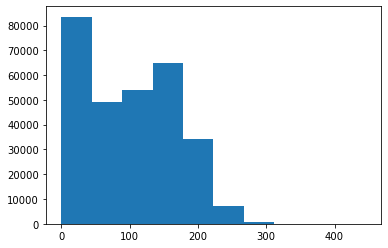

In [2]:
# Dataset #1: random
df_random_subset_1     = pd.read_csv('training_data/rand1.csv', header = None)
df_random_subset_2     = pd.read_csv('training_data/rand2.csv', header = None)
df_random_subset_3     = pd.read_csv('training_data/rand3.csv', header = None)
df_random_subset_4     = pd.read_csv('training_data/rand4.csv', header = None)
df_random_subset_5     = pd.read_csv('training_data/rand5.csv', header = None)
df_random_subset_6     = pd.read_csv('training_data/rand6.csv', header = None)
df_random_subset_7     = pd.read_csv('training_data/rand7.csv', header = None)
df_random_subset_8     = pd.read_csv('training_data/rand8.csv', header = None)
df_random_subset_9     = pd.read_csv('training_data/rand9.csv', header = None)
df_random_subset_10     = pd.read_csv('training_data/rand10.csv', header = None)

df_random_subset_11     = pd.read_csv('training_data/rand11.csv', header = None)
df_random_subset_12     = pd.read_csv('training_data/rand12.csv', header = None)
df_random_subset_13     = pd.read_csv('training_data/rand13.csv', header = None)
df_random_subset_14     = pd.read_csv('training_data/rand14.csv', header = None)
df_random_subset_15     = pd.read_csv('training_data/rand15.csv', header = None)
df_random_subset_16     = pd.read_csv('training_data/rand16.csv', header = None)
df_random_subset_17     = pd.read_csv('training_data/rand17.csv', header = None)
df_random_subset_18     = pd.read_csv('training_data/rand18.csv', header = None)
df_random_subset_19     = pd.read_csv('training_data/rand19.csv', header = None)
df_random_subset_20     = pd.read_csv('training_data/rand20.csv', header = None)

df_random_subset_21     = pd.read_csv('training_data/rand21.csv', header = None)
df_random_subset_22     = pd.read_csv('training_data/rand22.csv', header = None)
df_random_subset_23     = pd.read_csv('training_data/rand23.csv', header = None)
df_random_subset_24     = pd.read_csv('training_data/rand24.csv', header = None)
df_random_subset_25     = pd.read_csv('training_data/rand25.csv', header = None)
df_random_subset_26     = pd.read_csv('training_data/rand26.csv', header = None)
df_random_subset_27     = pd.read_csv('training_data/rand27.csv', header = None)


df_random     = np.concatenate((df_random_subset_1.to_numpy(),
                                df_random_subset_2.to_numpy(),
                                df_random_subset_3.to_numpy(),
                                df_random_subset_4.to_numpy(),
                                df_random_subset_5.to_numpy(),
                                df_random_subset_6.to_numpy(),
                                df_random_subset_7.to_numpy(),
                                df_random_subset_8.to_numpy(),
                                df_random_subset_9.to_numpy(),
                                df_random_subset_10.to_numpy(),
                                df_random_subset_11.to_numpy(),
                                df_random_subset_12.to_numpy(),
                                df_random_subset_13.to_numpy(),
                                df_random_subset_14.to_numpy(),                              
                                df_random_subset_15.to_numpy(),
                                df_random_subset_16.to_numpy(),
                                df_random_subset_17.to_numpy(),
                                df_random_subset_18.to_numpy(),
                                df_random_subset_19.to_numpy(),
                                df_random_subset_20.to_numpy(),
                                df_random_subset_21.to_numpy(),                               
                                df_random_subset_22.to_numpy(),                               
                                df_random_subset_23.to_numpy(),
                                df_random_subset_24.to_numpy(),
                                df_random_subset_25.to_numpy(),
                                df_random_subset_26.to_numpy(),
                                df_random_subset_27.to_numpy()))

df_random = np.delete(df_random, np.where(df_random == 540)[0], axis=0)
df_random = df_random[:,1:]
plt.hist(df_random[:,-1])
df_random.shape



(7200, 49)

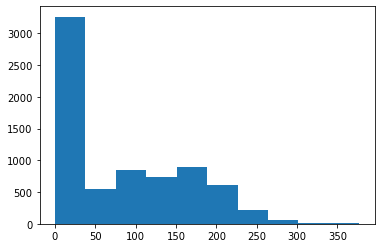

In [3]:
# Dataset #2: uniform scaling
df_uniform            = pd.read_csv('training_data/uniform.csv', header = None)
df_uniform            = df_uniform.to_numpy()
df_uniform            = np.delete(df_uniform, np.where(df_uniform == 540)[0], axis=0)
df_uniform            = df_uniform[:,1:]
plt.hist(df_uniform[:,-1])
df_uniform.shape


(13010, 49)

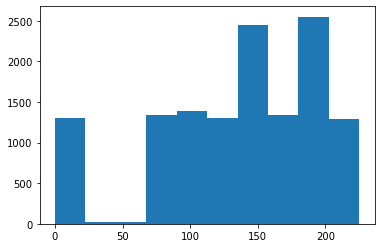

In [4]:
# Dataset #3a: component OAT
df_comp               = pd.read_csv('training_data/comp.csv', header = None)
df_comp               = df_comp.to_numpy()
df_comp               = np.delete(df_comp, np.where(df_comp == 540)[0], axis=0)
df_comp               = df_comp[:,1:]
df_comp               = df_comp[df_comp[:,7 ] == 1]
df_comp               = df_comp[df_comp[:,8 ] == 1]
df_comp               = df_comp[df_comp[:,9 ] == 1]
df_comp               = df_comp[df_comp[:,10] == 1]
df_comp               = df_comp[df_comp[:,11] == 1]
plt.hist(df_comp[:,-1])

df_comp.shape

(13010, 49)

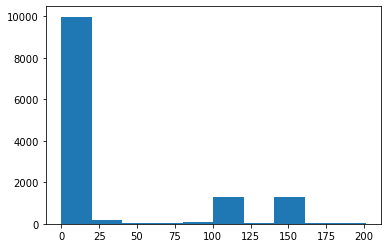

In [5]:
# Dataset #3b: component OAT (reverse)
df_comp_reverse       = pd.read_csv('training_data/comp_reverse.csv', header = None)
df_comp_reverse       = df_comp_reverse.to_numpy()
df_comp_reverse       = np.delete(df_comp_reverse, np.where(df_comp_reverse == 540)[0], axis=0)
df_comp_reverse       = df_comp_reverse[:,1:]
df_comp_reverse       = df_comp_reverse[df_comp_reverse[:,7 ] == 1]
df_comp_reverse       = df_comp_reverse[df_comp_reverse[:,8 ] == 1]
df_comp_reverse       = df_comp_reverse[df_comp_reverse[:,9 ] == 1]
df_comp_reverse       = df_comp_reverse[df_comp_reverse[:,10] == 1]
df_comp_reverse       = df_comp_reverse[df_comp_reverse[:,11] == 1]
plt.hist(df_comp_reverse[:,-1])

df_comp_reverse.shape

(11793, 49)

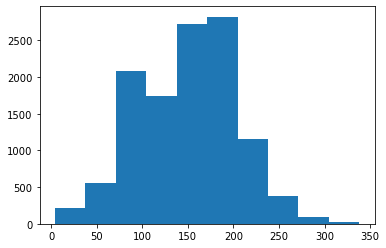

In [6]:
# Dataset #4: system random OAT 
df_sys_rand           = pd.read_csv('training_data/sys_rand.csv', header = None)
df_sys_rand           = df_sys_rand.to_numpy()
df_sys_rand           = np.delete(df_sys_rand, np.where(df_sys_rand == 540)[0], axis=0)
df_sys_rand           = df_sys_rand[:,1:]
df_sys_rand           = df_sys_rand[df_sys_rand[:,9] == 1]

plt.hist(df_sys_rand[:,-1])


df_sys_rand.shape

(2890, 49)

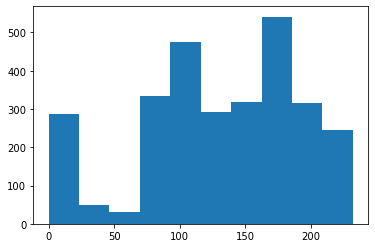

In [7]:
# Dataset #5a: system OAT
df_sys                = pd.read_csv('training_data/sys.csv', header = None)
df_sys                = df_sys.to_numpy()
df_sys                = np.delete(df_sys, np.where(df_sys == 540)[0], axis=0)
df_sys                = df_sys[:,1:]
df_sys                = df_sys[df_sys[:,9] == 1]
plt.hist(df_sys[:,-1])


df_sys.shape

(2890, 49)

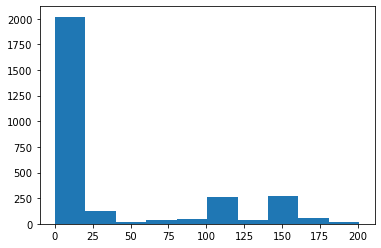

In [8]:
# Dataset #5b: system OAT reverse
df_sys_reverse                = pd.read_csv('training_data/sys_reverse.csv', header = None)
df_sys_reverse                = df_sys_reverse.to_numpy()
df_sys_reverse                = np.delete(df_sys_reverse, np.where(df_sys_reverse == 540)[0], axis=0)
df_sys_reverse                = df_sys_reverse[:,1:]
df_sys_reverse                = df_sys_reverse[df_sys_reverse[:,9] == 1]
plt.hist(df_sys_reverse[:,-1])


df_sys_reverse.shape

(10934, 49)

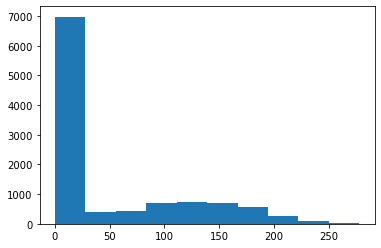

In [9]:
# Dataset #7: system random reverse
df_sys_rand_reverse                = pd.read_csv('training_data/sys_rand_reverse.csv', header = None)
df_sys_rand_reverse                = df_sys_rand_reverse.to_numpy()
df_sys_rand_reverse                = np.delete(df_sys_rand_reverse, np.where(df_sys_rand_reverse == 540)[0], axis=0)
df_sys_rand_reverse                = df_sys_rand_reverse[:,1:]
df_sys_rand_reverse                = df_sys_rand_reverse[df_sys_rand_reverse[:,9] == 1]
plt.hist(df_sys_rand_reverse[:,-1])


df_sys_rand_reverse.shape

(13277, 49)

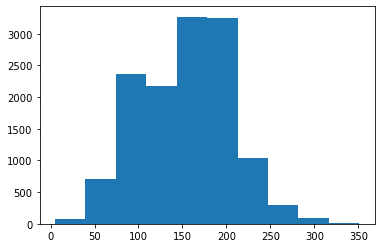

In [10]:
# Dataset #6: baseline
df_baseline           = pd.read_csv('training_data/baseline.csv', header = None)
df_baseline           = df_baseline.to_numpy()
df_baseline           = np.delete(df_baseline, np.where(df_baseline == 540)[0], axis=0)
df_baseline           = df_baseline[:,1:]
df_baseline           = df_baseline[df_baseline[:,9] == 1]
plt.hist(df_baseline[:,-1])


df_baseline.shape

(73185, 49)

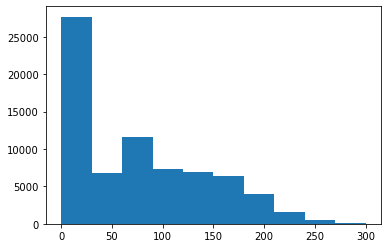

In [11]:
# Dataset #7: system random low target

df_sys_rand_lowT                = pd.read_csv('training_data/sys_rand_low_target.csv', header = None)
df_sys_rand_lowT                = df_sys_rand_lowT.to_numpy()
df_sys_rand_lowT                = np.delete(df_sys_rand_lowT, np.where(df_sys_rand_lowT == 540)[0], axis=0)
df_sys_rand_lowT                = df_sys_rand_lowT[:,1:]
df_sys_rand_lowT                = df_sys_rand_lowT[df_sys_rand_lowT[:,9] == 1]
plt.hist(df_sys_rand_lowT[:,-1])


df_sys_rand_lowT.shape


In [12]:
main_random_data  = df_random
main_handsel_data = np.concatenate((df_uniform, df_comp, df_comp_reverse, df_sys_rand,df_sys, df_sys_reverse, df_baseline, df_sys_rand_reverse, df_sys_rand_lowT))

main_random_data.shape[0] / (main_handsel_data.shape[0] + main_random_data.shape[0])


0.6644719115878993

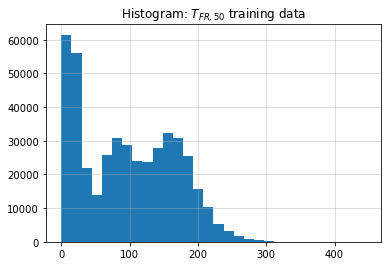

In [13]:
# Settings
pTrain = 0.80
pValidate = 0.10
pTest = 0.10

# data = np.concatenate((df_random, df_uniform, df_comp, df_comp_reverse, df_sys_rand,df_sys, df_sys_reverse, df_baseline, df_sys_rand_reverse, df_sys_rand_lowT))
main_random_data  = df_random
main_handsel_data = np.concatenate((df_uniform, df_comp, df_comp_reverse, df_sys_rand,df_sys, df_sys_reverse, df_baseline, df_sys_rand_reverse, df_sys_rand_lowT))

p_random = 0.664
p_nonrand = 1 - p_random
n_random_sample = 441000

# Extract subset of random data
idx  = np.arange(1, main_random_data.shape[0])
idx = np.random.choice(idx ,(int(n_random_sample*p_random)), replace=False)
main_random_data = main_random_data[idx, :]

# Extract subset of handsel data
idx  = np.arange(1, main_handsel_data.shape[0])
idx = np.random.choice(idx ,(int(n_random_sample*p_nonrand)), replace=False)
main_handsel_data = main_handsel_data[idx, :]

data = np.concatenate((main_random_data, main_handsel_data))

# Shuffle data        
np.random.shuffle(data)        

# Definition of inputs and outputs
size_data = data.shape
input_data  = data[:,:(size_data[1]-1)]
output_data = data[:,-1]


###### R2 accuracy metrics
handsel_data     = np.concatenate((df_uniform, df_comp, df_comp_reverse, df_sys_rand,df_sys, df_sys_reverse, df_baseline, df_sys_rand_reverse, df_sys_rand_lowT))
handsel_input    = handsel_data[:,:(size_data[1]-1)]
handsel_label    = handsel_data[:,-1]

Tsub14_idx             = np.where(handsel_data[:,-1] < 14)
handsel_Tsub14_data    = handsel_data[Tsub14_idx,:]
handsel_Tsub14_data    = handsel_Tsub14_data[0]
handsel_Tsub14_input   = handsel_Tsub14_data[:,:(size_data[1]-1)]
handsel_Tsub14_label   = handsel_Tsub14_data[:,-1]

Tsub30_idx             = np.where(handsel_data[:,-1] < 30)
handsel_Tsub30_data    = handsel_data[Tsub30_idx,:]
handsel_Tsub30_data    = handsel_Tsub30_data[0]
handsel_Tsub30_input   = handsel_Tsub30_data[:,:(size_data[1]-1)]
handsel_Tsub30_label   = handsel_Tsub30_data[:,-1]

Tsub120_idx             = np.where(handsel_data[:,-1] < 120)
handsel_Tsub120_data    = handsel_data[Tsub120_idx,:]
handsel_Tsub120_data    = handsel_Tsub120_data[0]
handsel_Tsub120_input   = handsel_Tsub120_data[:,:(size_data[1]-1)]
handsel_Tsub120_label   = handsel_Tsub120_data[:,-1]

Tsub365_idx             = np.where(handsel_data[:,-1] < 365)
handsel_Tsub365_data    = handsel_data[Tsub365_idx,:]
handsel_Tsub365_data    = handsel_Tsub365_data[0]
handsel_Tsub365_input   = handsel_Tsub365_data[:,:(size_data[1]-1)]
handsel_Tsub365_label   = handsel_Tsub365_data[:,-1]

random_data         = df_random
random_data_input   = random_data[:,:(size_data[1]-1)]
random_data_label   = random_data[:,-1]

Tsub14_idx             = np.where(random_data[:,-1] < 14)
random_Tsub14_data     = random_data[Tsub14_idx,:]
random_Tsub14_data     = random_Tsub14_data[0]
random_Tsub14_input    = random_Tsub14_data[:,:(size_data[1]-1)]
random_Tsub14_label    = random_Tsub14_data[:,-1]

Tsub30_idx             = np.where(random_data[:,-1] < 30)
random_Tsub30_data     = random_data[Tsub30_idx,:]
random_Tsub30_data     = random_Tsub30_data[0]
random_Tsub30_input    = random_Tsub30_data[:,:(size_data[1]-1)]
random_Tsub30_label    = random_Tsub30_data[:,-1]

Tsub120_idx             = np.where(random_data[:,-1] < 120)
random_Tsub120_data     = random_data[Tsub120_idx,:]
random_Tsub120_data     = random_Tsub120_data[0]
random_Tsub120_input    = random_Tsub120_data[:,:(size_data[1]-1)]
random_Tsub120_label    = random_Tsub120_data[:,-1]

Tsub365_idx             = np.where(random_data[:,-1] < 365)
random_Tsub365_data     = random_data[Tsub365_idx,:]
random_Tsub365_data     = random_Tsub365_data[0]
random_Tsub365_input    = random_Tsub365_data[:,:(size_data[1]-1)]
random_Tsub365_label    = random_Tsub365_data[:,-1]

oat_data            = df_comp
oat_data_input      = oat_data[:,:(size_data[1]-1)]
oat_data_label      = oat_data[:,-1]


# Normal standarization of data 
scaler = StandardScaler()
scaler.fit(input_data)

# Plot distribution of output_data
plt.hist(output_data, bins=30)
plt.title('Histogram: $T_{FR,50}$ training data')
plt.grid(alpha = 0.5)
plt.show()        

In [14]:
# Store the "transform" (mus, sigmas) in a pickle, to be applied to the data later
with open('trained_model/scaler_nn1_imp_dataneeds.pkl', 'wb') as f:
        pickle.dump(scaler, f)

input_data              = scaler.transform(input_data)
handsel_data_input      = scaler.transform(handsel_input)
random_data_input       = scaler.transform(random_data_input)
oat_data_input          = scaler.transform(oat_data_input)

handsel_Tsub14_input    = scaler.transform(handsel_Tsub14_input)
handsel_Tsub30_input    = scaler.transform(handsel_Tsub30_input)
handsel_Tsub120_input   = scaler.transform(handsel_Tsub120_input)
handsel_Tsub365_input   = scaler.transform(handsel_Tsub365_input)

random_Tsub14_input     = scaler.transform(random_Tsub14_input)
random_Tsub30_input     = scaler.transform(random_Tsub30_input)
random_Tsub120_input    = scaler.transform(random_Tsub120_input)
random_Tsub365_input    = scaler.transform(random_Tsub365_input)

#Split into training, validation and testing set
#p1 and p2 are thresholds to which the data is divided

# DATA MUST BE SHUFFLED
p1 = int(size_data[0]*pTrain) # train
train_data = input_data[:p1,:]
train_label = output_data[:p1]

p2 = int(size_data[0]*(pTest)) # validate and test
valid_data = input_data[p1:p2,:]
valid_label = output_data[p1:p2]

test_data = input_data[p2:,:]
test_label = output_data[p2:]

Tsub7_idx           = np.where((test_label < 7))
test_Tsub7_data     = test_data[Tsub7_idx,:]
test_Tsub7_data     = test_Tsub7_data[0]
test_Tsub7_label    = test_label[Tsub7_idx]

Tsub14_idx           = np.where((test_label < 14))
test_Tsub14_data     = test_data[Tsub14_idx,:]
test_Tsub14_data     = test_Tsub14_data[0]
test_Tsub14_label    = test_label[Tsub14_idx]

Tsub30_idx           = np.where((test_label < 30))
test_Tsub30_data     = test_data[Tsub30_idx,:]
test_Tsub30_data     = test_Tsub30_data[0]
test_Tsub30_label    = test_label[Tsub30_idx]

Tsub120_idx           = np.where((test_label < 120))
test_Tsub120_data     = test_data[Tsub120_idx,:]
test_Tsub120_data     = test_Tsub120_data[0]
test_Tsub120_label    = test_label[Tsub120_idx]

Tsub365_idx           = np.where((test_label < 365))
test_Tsub365_data     = test_data[Tsub365_idx,:]
test_Tsub365_data     = test_Tsub365_data[0]
test_Tsub365_label    = test_label[Tsub365_idx]


## Train surrogate model 

In [76]:
# Training model. We're using scikit-learn since it works well with Numpy
# Hyperparameters that we found are entered.
mlp = MLPRegressor(hidden_layer_sizes=4*(150,), learning_rate_init=0.0003,  tol = 1e-4, max_iter=800, alpha=0.005, verbose = True)

mlp.fit(train_data, train_label)
print('Model Fitted')

#Saving model for posteriority
with open('trained_model/model_fitted_nn_v1_dataneeds.pkl', 'wb') as f:
        pickle.dump(mlp, f)

Iteration 1, loss = 435.01305415
Iteration 2, loss = 69.50025174
Iteration 3, loss = 42.96096252
Iteration 4, loss = 30.24319735
Iteration 5, loss = 23.06773342
Iteration 6, loss = 18.21369093
Iteration 7, loss = 14.60554861
Iteration 8, loss = 12.25087500
Iteration 9, loss = 10.48135420
Iteration 10, loss = 9.33569937
Iteration 11, loss = 8.50771093
Iteration 12, loss = 7.74257711
Iteration 13, loss = 7.26670139
Iteration 14, loss = 6.74066050
Iteration 15, loss = 6.41040428
Iteration 16, loss = 6.07399163
Iteration 17, loss = 5.69077112
Iteration 18, loss = 5.40684737
Iteration 19, loss = 5.28735774
Iteration 20, loss = 5.04396063
Iteration 21, loss = 4.95733218
Iteration 22, loss = 4.66132638
Iteration 23, loss = 4.52202892
Iteration 24, loss = 4.39959751
Iteration 25, loss = 4.28894621
Iteration 26, loss = 4.15990843
Iteration 27, loss = 4.03193244
Iteration 28, loss = 3.96684891
Iteration 29, loss = 3.78532813
Iteration 30, loss = 3.82978952
Iteration 31, loss = 3.67933100
Iterati

## Load the saved model and compute $R^2$

In [15]:
#Load saved model so we don't need to train everytime

mlp    = pickle.load(open('trained_model/model_fitted_nn_v1_dataneeds.pkl','rb'))
scaler = pickle.load(open('trained_model/scaler_nn1_imp_dataneeds.pkl','rb'))


# Computing values predicted by the neural network
nn_train_label     = mlp.predict(train_data)
nn_test_label      = mlp.predict(test_data)

nn_test_sub14_label = mlp.predict(test_Tsub14_data)
nn_test_sub30_label = mlp.predict(test_Tsub30_data)
nn_test_sub120_label = mlp.predict(test_Tsub120_data)
nn_test_sub365_label = mlp.predict(test_Tsub365_data)


nn_handsel_label      = mlp.predict(handsel_data_input)
nn_random_label       = mlp.predict(random_data_input)

nn_handsel_Tsub14_label    = mlp.predict(handsel_Tsub14_input)
nn_handsel_Tsub30_label    = mlp.predict(handsel_Tsub30_input)
nn_handsel_Tsub120_label   = mlp.predict(handsel_Tsub120_input)
nn_handsel_Tsub365_label   = mlp.predict(handsel_Tsub365_input)

nn_random_Tsub14_label    = mlp.predict(random_Tsub14_input)
nn_random_Tsub30_label    = mlp.predict(random_Tsub30_input)
nn_random_Tsub120_label   = mlp.predict(random_Tsub120_input)
nn_random_Tsub365_label   = mlp.predict(random_Tsub365_input)

nn_oat_label              = mlp.predict(oat_data_input)

#Computing R2 error
r2_train = r2_score(train_label,nn_train_label)
r2_test  = r2_score(test_label,nn_test_label)

r2_test_sub14  = r2_score(test_Tsub14_label,nn_test_sub14_label)
r2_test_sub30  = r2_score(test_Tsub30_label,nn_test_sub30_label)
r2_test_sub120  = r2_score(test_Tsub120_label,nn_test_sub120_label)
r2_test_sub365  = r2_score(test_Tsub365_label,nn_test_sub365_label)

r2_handsel   = r2_score(handsel_label,      nn_handsel_label)
r2_random    = r2_score(random_data_label,  nn_random_label)
r2_oat       = r2_score(oat_data_label,     nn_oat_label)

r2_handsel_Tsub14     = r2_score(handsel_Tsub14_label,nn_handsel_Tsub14_label)
r2_handsel_Tsub30     = r2_score(handsel_Tsub30_label,nn_handsel_Tsub30_label)
r2_handsel_Tsub120    = r2_score(handsel_Tsub120_label,nn_handsel_Tsub120_label)
r2_handsel_Tsub365    = r2_score(handsel_Tsub365_label,nn_handsel_Tsub365_label)

r2_random_Tsub14      = r2_score(random_Tsub14_label,nn_random_Tsub14_label)
r2_random_Tsub30      = r2_score(random_Tsub30_label,nn_random_Tsub30_label)
r2_random_Tsub120     = r2_score(random_Tsub120_label,nn_random_Tsub120_label)
r2_random_Tsub365     = r2_score(random_Tsub365_label,nn_random_Tsub365_label)

#Printing accuracy values
print('R2 train data')
print(r2_train)

print('R2 test data')
print(r2_test)

print('R2 test T < 365 data')
print(r2_test_sub365)

print('R2 test T < 120 data')
print(r2_test_sub120)

print('R2 test T < 30 data')
print(r2_test_sub30)

print('R2 test T < 14 data')
print(r2_test_sub14)

R2 train data
0.9996295358488212
R2 test data
0.9996335405197764
R2 test T < 365 data
0.9996412993414894
R2 test T < 120 data
0.9984819042006752
R2 test T < 30 data
0.9830573542481811
R2 test T < 14 data
0.9317784991626407


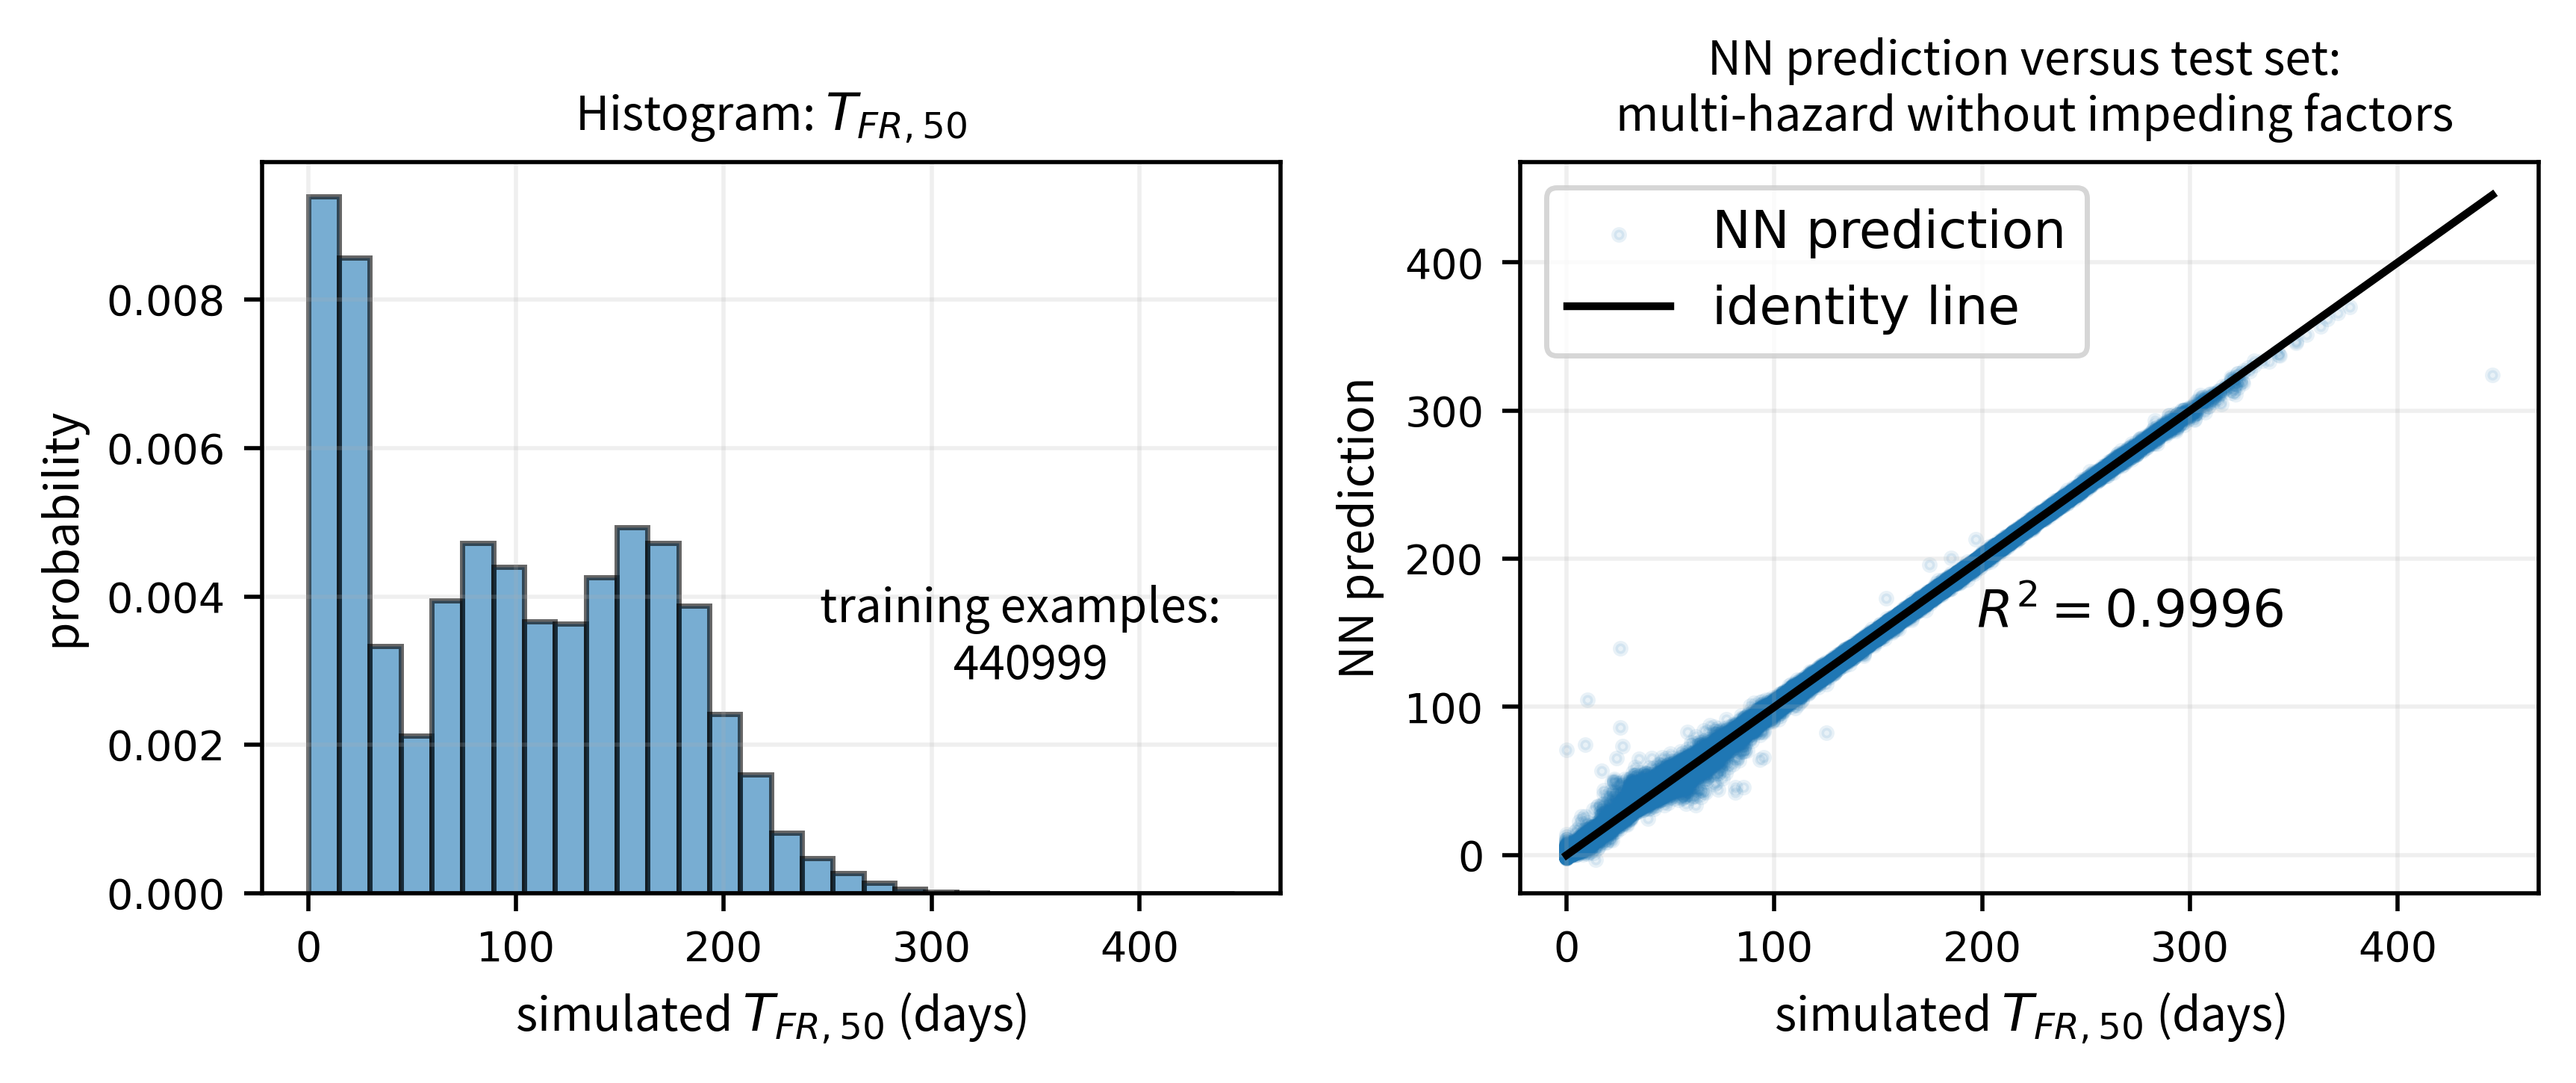

In [16]:
# Create summary dashboard
plt.figure(figsize=(7,3), dpi=500) 

ax1 = plt.subplot(1,2,1)
plt.hist(output_data, bins=30, histtype='bar', ec='black', density=True, alpha=0.6)
plt.title('Histogram: $T_{FR,50}$', fontsize=10, **font)          
plt.xlabel('simulated $T_{FR,50}$ (days)', **font) 
plt.ylabel('probability', **font) 
plt.grid(alpha = 0.2)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.text(0.75,0.35,'training examples: \n {}'.format(str(size_data[0])), horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes, fontsize=10, **font) 


ax2 = plt.subplot(1,2,2)
plt.scatter(test_label,nn_test_label,s=4, label = "NN prediction",alpha=0.1)
plt.plot([0,np.max(test_label)],[0,np.max(test_label)],color = 'k', label = "identity line")
plt.xlabel('simulated $T_{FR,50}$ (days)', **font)
plt.ylabel('NN prediction', **font)
plt.title('NN prediction versus test set: \n multi-hazard without impeding factors', fontsize=10, **font) 
plt.grid(alpha=0.2)
plt.text(0.75,0.35,'$R^2 = {}$'.format(str(np.round(r2_test,4))),horizontalalignment='right', verticalalignment='bottom', transform = ax2.transAxes, fontsize=10, **font) 
plt.legend()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout() 
